In [1]:
import pandas as pd
Dec2019=pd.read_csv('20191201_.csv')
Jan2020=pd.read_csv('20200101_.csv')
Feb2020=pd.read_csv('20200201_.csv')
Mar2020=pd.read_csv('20200301_.csv')
Apr2020=pd.read_csv('20200401_.csv')
May2020=pd.read_csv('20200501_.csv')
Jun2020=pd.read_csv('20200601_.csv')
Jul2020=pd.read_csv('20200701_.csv') #月をまたぐたびに追加すべし

Daily=pd.concat([Dec2019,Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020],ignore_index=True)\
        .rename(columns={'日付':'Lastday_of_the_week','Tweets published':'Tweets-done','インプレッション':'Impression','リツイート':'Retweets','いいね':'Like','エンゲージメント率':'EngagementRate'})\
        .query('Lastday_of_the_week >= "2019-12-18"')

Daily['Lastday_of_the_week']=pd.to_datetime(Daily['Lastday_of_the_week']) 
Daily.set_index('Lastday_of_the_week',inplace=True) #DatetimeIndexに変換、時系列データとして処理可能に
Weekly=Daily.resample('W-TUE').sum() #('W-WED',closed='left',label='left')で水曜開始で週束ね表示

week_num = pd.RangeIndex(start=1, stop=len(Weekly.index) + 1, step=1)
count_days=[7,3,7,5,2,3,4,5,1,3,4,6,3,6,6,0,4,4,2,2,1,4,1,2,2,2,3,5,5,5,6] #ここは毎週ハンド入力すべし
count_minutes=[130,60,105,80,60,35,95,75,10,50,105,120,300,765,285,0,95,\
               75,40,30,45,150,30,75,75,60,390,460,330,510,630] #ここも毎週ハンド入力すべし

Weekly.insert(0,'Week-No.',week_num)
Weekly.insert(1,'Days-done',count_days)
Weekly.insert(2,'Minutes-done',count_minutes)
Weekly.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Week-No.,Days-done,Minutes-done,Tweets-done,URLクリック数,Like,アプリインストール,アプリ表示,Impression,エンゲージメント,...,ハッシュタグクリック,フォローしている,メディアのエンゲージメント,メディアのエンゲージメント数,メディアの再生数,ユーザープロフィールクリック,Retweets,固定リンクのクリック数,詳細クリック,返信
Lastday_of_the_week,,,,,,,,,,,,,,,,,,,,,
2019-12-24,1,7,130,11,0,9,0,0,803,34,...,0,0,9.0,0.0,9,9,4,0,3,0
2019-12-31,2,3,60,9,2,3,0,0,690,35,...,2,0,9.0,0.0,9,2,1,0,16,0
2020-01-07,3,7,105,11,5,20,0,0,2002,87,...,3,0,38.0,0.0,38,2,6,0,12,1
2020-01-14,4,5,80,7,1,8,0,0,1986,51,...,0,0,18.0,0.0,18,4,14,0,6,0
2020-01-21,5,2,60,7,2,13,0,0,1418,53,...,1,0,15.0,0.0,15,0,14,0,8,0


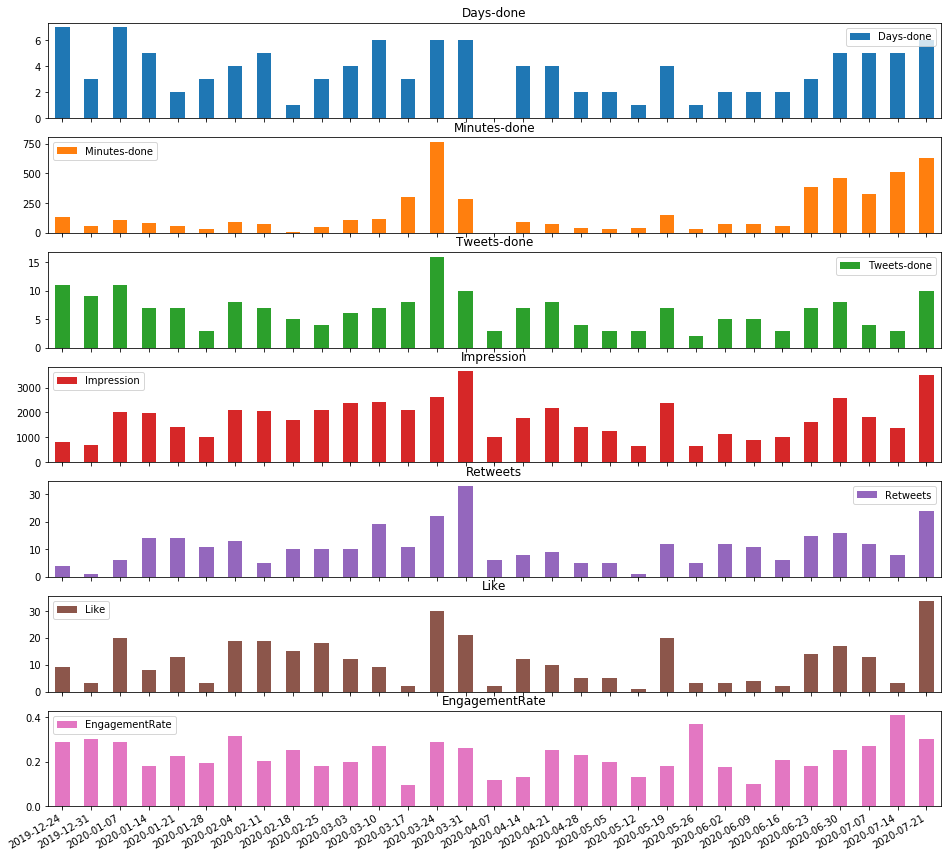

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Weekly_done=Weekly.loc[:,['Days-done','Minutes-done','Tweets-done','Impression','Retweets','Like','EngagementRate']]
Weekly_done.index=Weekly_done.index.format() #x軸のDatetimeIndexがタイムスタンプとして表示されるのを、短縮文字列yyyy-mm-ddに変換
Weekly_done.plot.bar(figsize=(16,16),subplots=True)
plt.gcf().autofmt_xdate() #x軸を斜めに見やすく
plt.savefig('Weekly-done.png')

In [32]:
#自由に集計する用
Weekly[['Days-done','Minutes-done','Tweets-done','Impression','Retweets','Like']]\
.sum().reset_index().rename(columns={0 : 'Cumulative'}).set_index('index', drop=True)

,Cumulative
index,
Days-done,102
Minutes-done,4130
Tweets-done,188
Impression,49374
Retweets,306
Like,312
